<a href="https://colab.research.google.com/github/nathanielmaina/AI-Coursework2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Airplane_Crashes_and_Fatalities_Since_1908.csv")


In [11]:
rows, cols = df.shape
print(f"number of rows: {rows}")
print(f"number of columns: {cols}")

number of rows: 5268
number of columns: 13


In [12]:
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [13]:
df.isnull().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


In [14]:
fatality_locations = df[['Date','Location','Aboard','Fatalities']]

fatality_locations.head()

,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [15]:
max_fatalities = fatality_locations['Fatalities'].max()

worst_day = fatality_locations[fatality_locations['Fatalities']== max_fatalities]

print("Highest number of fatalities:", max_fatalities)
print("Date of that crash:")
print(worst_day[['Date','Location','Fatalities']])

Highest number of fatalities: 583.0
Date of that crash:
            Date                  Location  Fatalities
2963  03/27/1977  Tenerife, Canary Islands       583.0


In [16]:
fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']

no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]

print(f"Number of crashes with no fatalities: {no_fatalities.shape[0]}")
no_fatalities.head()


Number of crashes with no fatalities: 58


/tmp/ipython-input-3439005171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']


,Date,Location,Aboard,Fatalities,Survivors
108,10/21/1926,English Channel,12.0,0.0,12.0
387,03/05/1936,"Near Tengya, China",6.0,0.0,6.0
889,10/08/1947,"Near El Paso, Texas",54.0,0.0,54.0
897,11/11/1947,"Gallup, New Mexico",25.0,0.0,25.0
1265,05/25/1953,"Amsterdam, Netherlands",34.0,0.0,34.0


In [17]:
fatality_locations[['Region', 'Country/State']] = fatality_locations['Location'].str.split(',', n=1, expand=True)

fatality_locations['Region'] = fatality_locations['Region'].str.strip()

fatality_locations['Country/State'] = fatality_locations['Country/State'].str.strip()

fatality_locations.head()


/tmp/ipython-input-1718727354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations[['Region', 'Country/State']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
/tmp/ipython-input-1718727354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations[['Region', 'Country/State']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
/tmp/ipython-input-1718727354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Date,Location,Aboard,Fatalities,Survivors,Region,Country/State
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,0.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,0.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,6.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,0.0,Near Johannisthal,Germany


In [18]:
top100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top100.head(10)


,Date,Location,Aboard,Fatalities,Survivors,Region,Country/State
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,61.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,4.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,0.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,0.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,0.0,AtlantiOcean,110 miles West of Ireland
3240,08/19/1980,"Near Riyadh, Saudi Arabia",301.0,301.0,0.0,Near Riyadh,Saudi Arabia
3775,07/03/1988,"Over the Persian Gulf, near Bandar Abbas, Iran",290.0,290.0,0.0,Over the Persian Gulf,"near Bandar Abbas, Iran"
4916,02/19/2003,"Near Shahdad, Iran",275.0,275.0,0.0,Near Shahdad,Iran
3137,05/25/1979,"Chicago O'Hare, Illinois",271.0,271.0,0.0,Chicago O'Hare,Illinois
3436,09/01/1983,"Near Sakhalin Island, Russia",269.0,269.0,0.0,Near Sakhalin Island,Russia


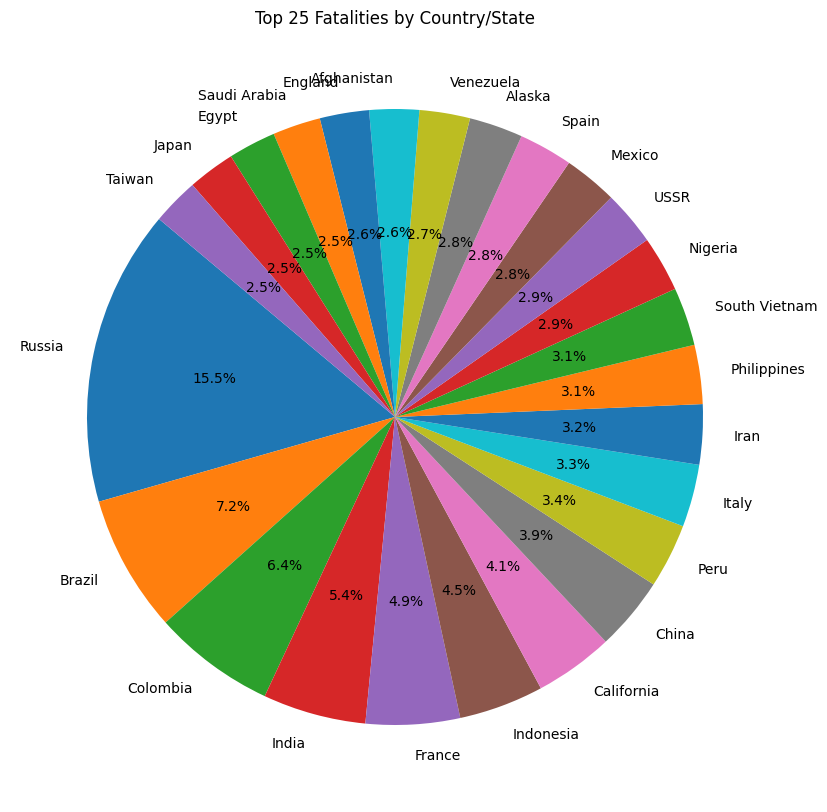

In [19]:
top25 = (fatality_locations.groupby('Country/State')['Fatalities']
          .sum()
          .sort_values(ascending=False)
          .head(25))

plt.figure(figsize=(10,10))
plt.pie(top25, labels=top25.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Fatalities by Country/State')
plt.show()
